# Introduction to AI Summer Assessment Project
Name: Oscar Evans

Email: gs18804@bristol.ac.uk

Student Number: 1806113

## Exploratory Analysis
Load the data, visualise some images and labels

In [8]:
import pandas as pd
import pprint as pp
import matplotlib.pyplot as plt
import cv2
from pathlib import Path
# progress bar
from tqdm.notebook import tqdm as tqdm_notebook

import pickle

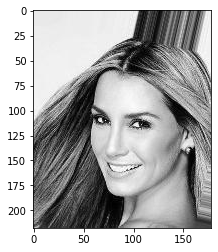

In [17]:
imagePath='./img_align_celeba/'
imageName='000001.jpg'
gray = cv2.imread(imagePath+imageName, cv2.IMREAD_GRAYSCALE)

plt.imshow(gray, cmap='gray')

In [29]:
# # read 1000 greyscale images into a list
# imagePaths = sorted(Path("img_align_celeba").rglob("*.jpg"))
# images=[]
# for imageName in tqdm_notebook(imagePaths[:1000]):
#     img=cv2.imread(str(imageName), cv2.IMREAD_GRAYSCALE)
#     images.append(img)

# print(len(images))
# pickle.dump(images, open("1000gray_images.p", "wb" ))
images=pickle.load(open( "1000gray_images.p", "rb" ))


1000


(218, 178)


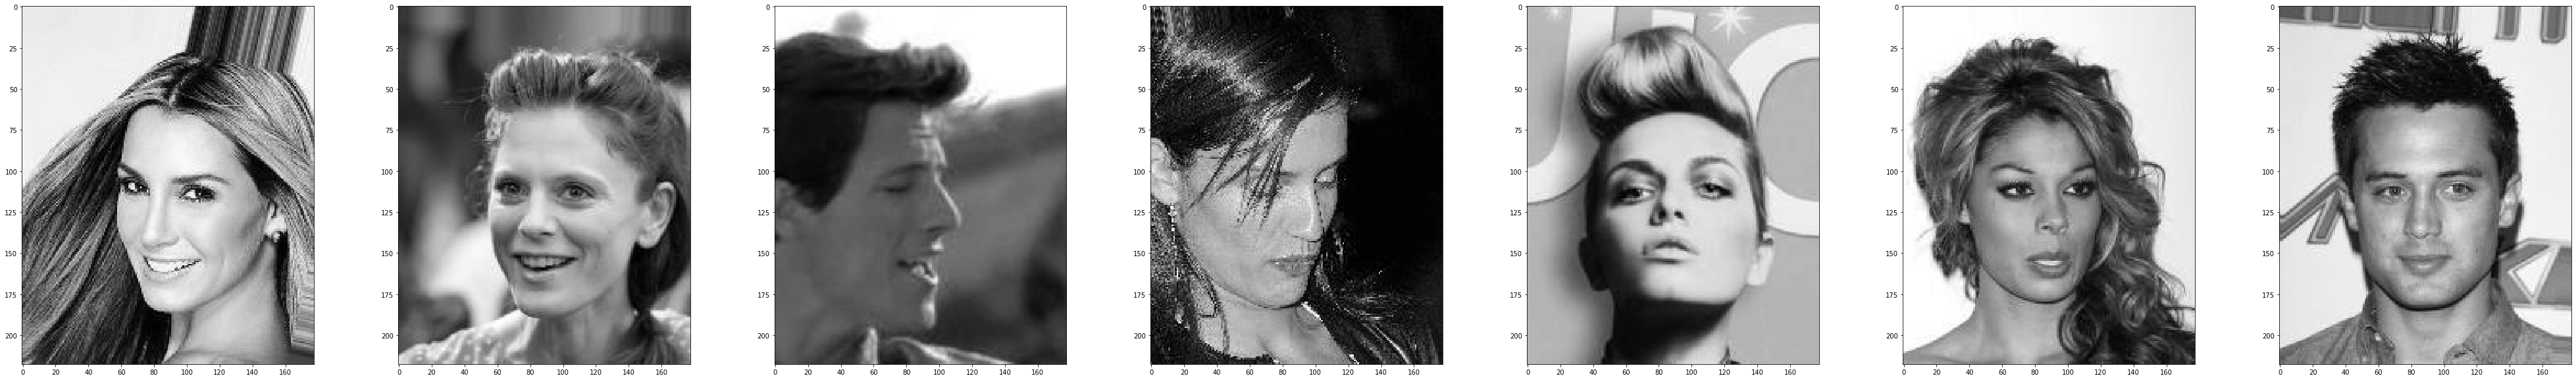

In [30]:
#### TAKEN FROM A UNIT IN KUL ####
# visualise images from dataset
def plot_image_sequence(data, n, imgs_per_row=7, figsize=(10,10), cmap='gray'):
    n_rows = 1 + int(n/(imgs_per_row+1))
    n_cols = min(imgs_per_row, n)
    
    f,ax = plt.subplots(n_rows,n_cols, figsize=(figsize[0]*n_cols,figsize[1]*n_rows))
    for i in range(n):
        if n == 1:
            ax.imshow(data[i], cmap=cmap)
        elif n_rows > 1:
            ax[int(i/imgs_per_row),int(i%imgs_per_row)].imshow(data[i], cmap=cmap)
        else:
            ax[int(i%n)].imshow(data[i], cmap=cmap)
    plt.show()

n = 7
print(images[0].shape)
plot_image_sequence(images, n)

In [26]:
all_labels = pd.read_csv('list_attr_celeba.txt', sep='\s+', header=1, index_col=0)
print(len(all_labels))

202599


In [27]:
# read 1000 rows
labels=all_labels.head(n=1000)
print(len(labels))

pp.pprint(labels.head(n=3))


1000
            5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  \
000001.jpg                -1                1           1               -1   
000002.jpg                -1               -1          -1                1   
000003.jpg                -1               -1          -1               -1   

            Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  Blond_Hair  ...  \
000001.jpg    -1     -1        -1        -1          -1          -1  ...   
000002.jpg    -1     -1        -1         1          -1          -1  ...   
000003.jpg    -1     -1         1        -1          -1          -1  ...   

            Sideburns  Smiling  Straight_Hair  Wavy_Hair  Wearing_Earrings  \
000001.jpg         -1        1              1         -1                 1   
000002.jpg         -1        1             -1         -1                -1   
000003.jpg         -1       -1             -1          1                -1   

            Wearing_Hat  Wearing_Lipstick  Wearing_Necklace  Wea

## First Deep Learning Model
Unravel each image and use an ANN to classify the facial attributes

In [31]:
import tensorflow as tf

In [35]:
# check for GPU
tf.config.list_physical_devices('GPU')

[]